| Concept         | Explanation                                                                 |
|-----------------|-----------------------------------------------------------------------------|
| Car_ID          | Unique id of each observation (Interger)                                    |
| Symboling       | Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably                      pretty safe.(Categorical)                                                  |                                          
| carCompany      | Name of car company (Categorical)		                                    |
| fueltype        | Car fuel type i.e gas or diesel (Categorical)		                        |
| aspiration      | Aspiration used in a car (Categorical)		                                |
| doornumber      | Number of doors in a car (Categorical)                                      |
| carbody         | body of car (Categorical)		                                            |
| drivewheel      | type of drive wheel (Categorical)                                           |
| enginelocation  | Location of car engine (Categorical)                                        |
| wheelbase		  | Wheelbase of car (Numeric)		                                            |
| carlength       | Length of car (Numeric)	                                                    |
| carwidth		  | Width of car (Numeric)		                                                |
| carheight		  | height of car (Numeric)                                                     |
| curbweight      | The weight of a car without occupants or baggage. (Numeric)		            |
| enginetype	  | Type of engine. (Categorical)		                                        |
| cylindernumber  | cylinder placed in the car (Categorical)                                    |
| enginesize	  |	Size of car (Numeric)		                                                |
| fuelsystem      | Fuel system of car (Categorical)                                            |
| boreratio       | Boreratio of car (Numeric)		                                            |
| stroke          | Stroke or volume inside the engine (Numeric)		                        |
| compressionratio| compression ratio of car (Numeric)                                          |
| horsepower      | Horsepower (Numeric)                                                        |
| peakrpm         | car peak rpm (Numeric)                                                      |
| citympg         | Mileage in city (Numeric)                                                   |
| highwaympg      | Mileage on highway (Numeric)                                                |
| price(Dependent variable)| Price of car (Numeric)                                             |

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### loading the data

In [55]:
df = pd.read_csv("CarPrice_Assignment.csv")

### Exploratory Data Analysis

In [56]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [58]:
cat_cols = df.select_dtypes(include='object')
num_cols = df.select_dtypes(include=['float64', 'int64'])

In [59]:
for col in cat_cols:
    print(col + " : " + str(cat_cols[col].nunique()))

CarName : 147
fueltype : 2
aspiration : 2
doornumber : 2
carbody : 5
drivewheel : 3
enginelocation : 2
enginetype : 7
cylindernumber : 7
fuelsystem : 8


In [60]:
for col in num_cols:
    print(col + " : " + str(num_cols[col].nunique()))

car_ID : 205
symboling : 6
wheelbase : 53
carlength : 75
carwidth : 44
carheight : 49
curbweight : 171
enginesize : 44
boreratio : 38
stroke : 37
compressionratio : 32
horsepower : 59
peakrpm : 23
citympg : 29
highwaympg : 30
price : 189


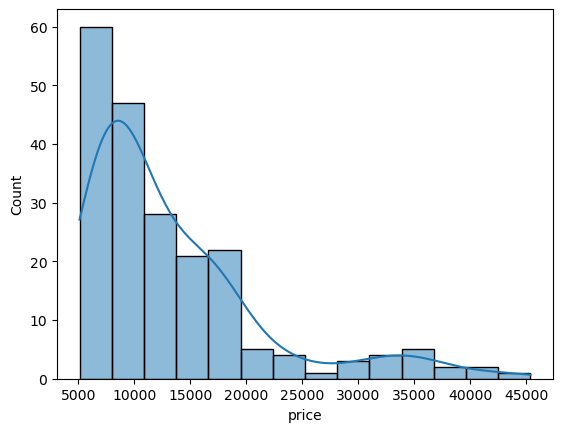

In [61]:
sns.histplot(x='price', data=df, kde=True)
plt.show()

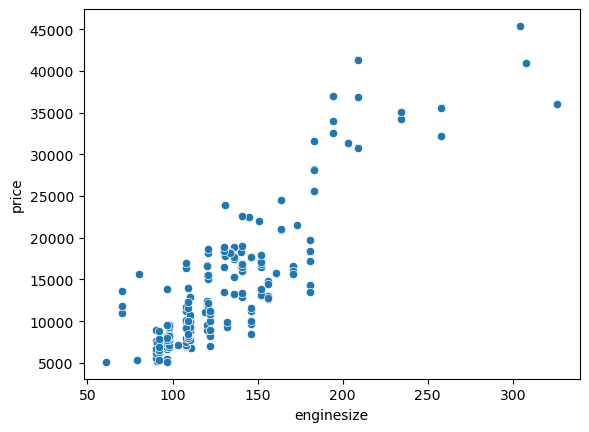

In [62]:
sns.scatterplot(x='enginesize', y='price', data=df)
plt.show()

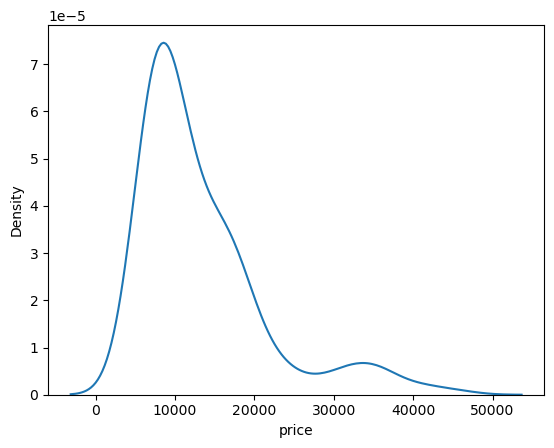

In [63]:
sns.kdeplot(x='price', data=df)
plt.show()

In [64]:
df.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


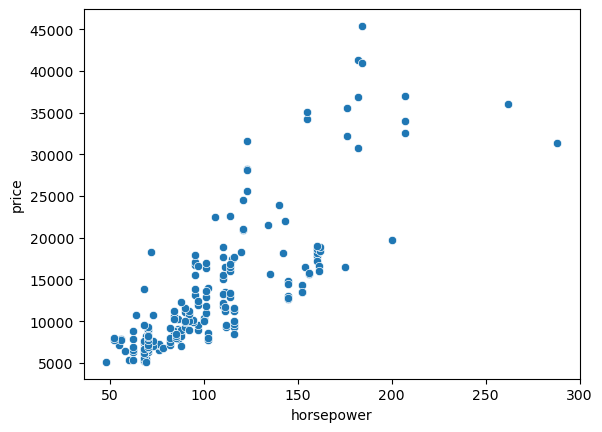

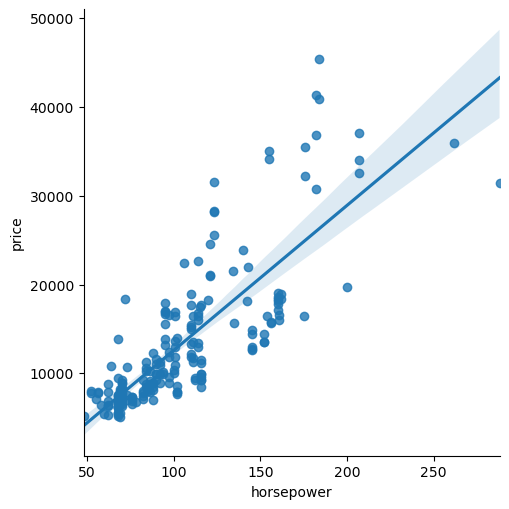

In [65]:
sns.scatterplot(x='horsepower', y='price', data=df)
sns.lmplot(x='horsepower', y='price', data=df)
plt.show()

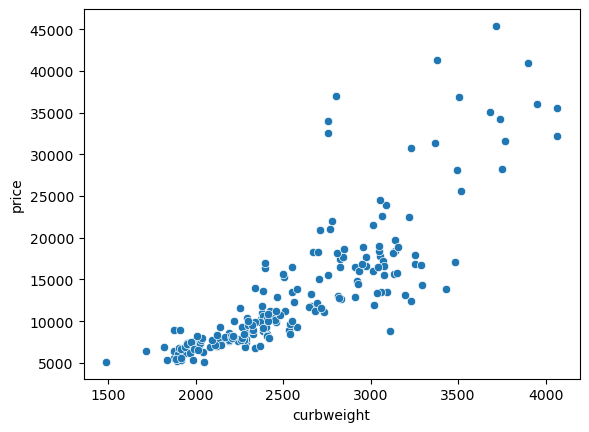

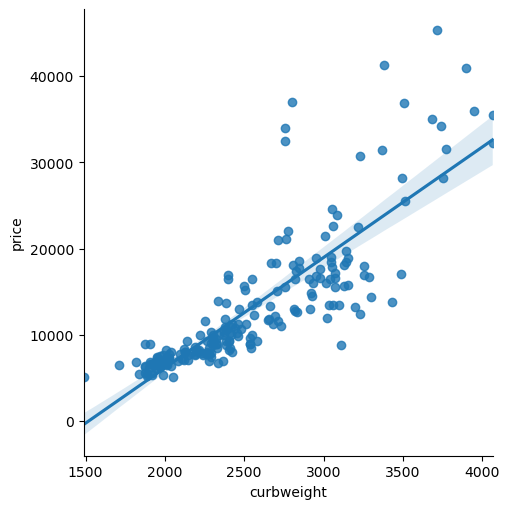

In [66]:
sns.scatterplot(x='curbweight', y='price', data=df)
sns.lmplot(x='curbweight', y='price', data=df)
plt.show()

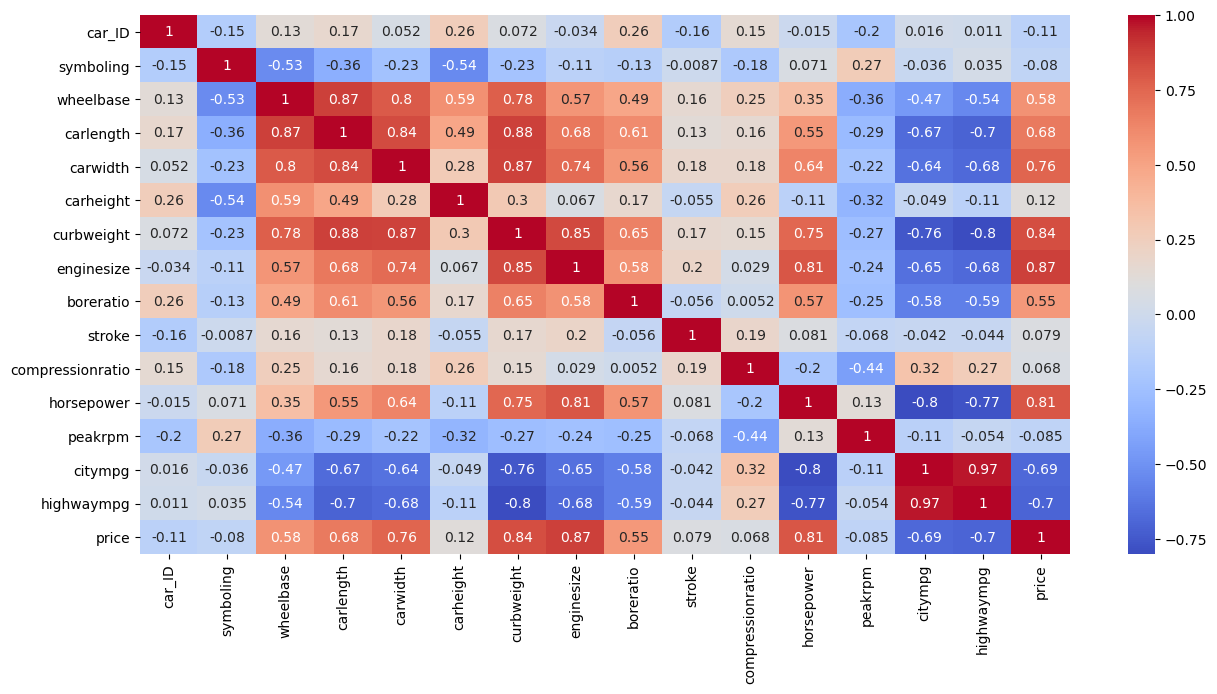

In [67]:
plt.figure(figsize=(15,7))
sns.heatmap(data=df.corr(), annot=True, cmap='coolwarm')
plt.show()

<AxesSubplot:xlabel='carbody', ylabel='price'>

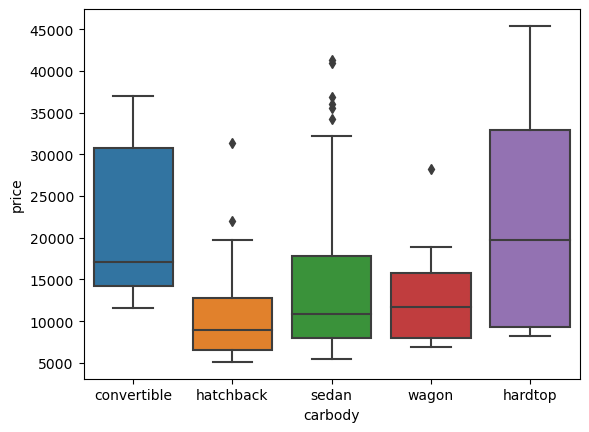

In [68]:
sns.boxplot(x='carbody', y='price', data=df)

In [69]:
len(df.columns)

26

### Preprocessing

In [70]:
df = df.drop('car_ID', axis=1)
df.head(5)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [71]:
# Getting the brand names
df['CarName'] = df['CarName'].apply(lambda car_name: car_name.split()[0])

# Getting top 10 brand names
top_5 = df['CarName'].value_counts().nlargest(5)

#Replacing rare brand names with 'others'
df['CarName'] = df['CarName'].apply(lambda car_name: car_name if car_name in top_5 else 'others')

In [72]:
df['symboling'] = df['symboling'].astype('object')

In [73]:
df_encoded = pd.get_dummies(df, drop_first=True,)                             

In [74]:
df_encoded.head(5)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,1,0,0


In [75]:
df_encoded.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'symboling_-1',
       'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3',
       'CarName_mazda', 'CarName_mitsubishi', 'CarName_nissan',
       'CarName_others', 'CarName_toyota', 'fueltype_gas', 'aspiration_turbo',
       'doornumber_two', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_sp

### Spliting the data

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X = df_encoded.drop(labels=['price'], axis=1)

In [78]:
y = df_encoded['price']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Algorithm Selection & Feature Scaling

In [80]:
# Selecting the power of polynomial to use
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
score = [] 
for degree in range(1,5):
    poly_converter = PolynomialFeatures(degree, include_bias=False)
    X_train_poly = poly_converter.fit_transform(X_train)
    X_test_poly = poly_converter.transform(X_test)
    
    lr_model = LinearRegression()
    scaler = StandardScaler()
    
    X_trained_scaled = scaler.fit_transform(X_train_poly)
    X_test_scaled = scaler.transform(X_test_poly)
    
    lr_model.fit(X_trained_scaled, y_train)
    lr_pred = lr_model.predict(X_test_scaled)
    
    r2 = r2_score(y_test,lr_pred)
    score.append(r2)
    print(f"{degree} :{r2}")
print(score)

1 :0.8934105619895756
2 :-1.9207261999654057e+20
3 :-1.3553082952859967e+23
4 :-8.447983187325776e+20
[0.8934105619895756, -1.9207261999654057e+20, -1.3553082952859967e+23, -8.447983187325776e+20]


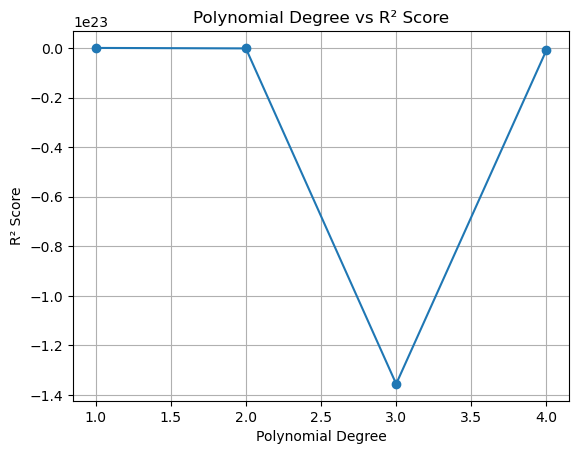

In [81]:
plt.plot(range(1, 5), score, marker='o')
plt.title("Polynomial Degree vs R² Score")
plt.xlabel("Polynomial Degree")
plt.ylabel("R² Score")
plt.grid(True)
plt.show()

Higher degrees showed a decrease in r2_score suggesting overfitting

#### linear regression

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [83]:
lr_model = LinearRegression()
scaler = StandardScaler()

X_trained_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model.fit(X_trained_scaled, y_train)

lr_pred = lr_model.predict(X_test_scaled)

In [84]:
r2 = r2_score(y_test, lr_pred)
RMSE = mean_squared_error(y_test, lr_pred, squared=False)
print(f"Linear Regression Metrics")
print(f"Linear Regression RMSE : {RMSE}")
print(f"R2_SCORE : {r2}")

Linear Regression Metrics
Linear Regression RMSE : 2717.5325166550456
R2_SCORE : 0.8934105619895759


In [85]:
lr_error = y_test - lr_pred

#### Regularisation

In [86]:
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV

In [87]:
lasso_model = LassoCV(max_iter=100000,alphas=[0.1, 1.0, 10.0], cv=5)
lasso_model.fit(X_trained_scaled, y_train)
print("Lasso model RMSE:", mean_squared_error(y_test, lasso_model.predict(X_test_scaled), squared=False))
print("Lasso model R2:", r2_score(y_test, lasso_model.predict(X_test_scaled)))

Lasso model RMSE: 2852.2545480854833
Lasso model R2: 0.8825802270275376


In [88]:
enet_model = ElasticNetCV(alphas=[0.1, 1.0, 10.0], cv=5)
enet_model.fit(X_trained_scaled, y_train)
print("ElasticNet model RMSE:", mean_squared_error(y_test, enet_model.predict(X_test_scaled), squared=False))
print("ElasticNet model R2:", r2_score(y_test, enet_model.predict(X_test_scaled)))

ElasticNet model RMSE: 3328.772969608643
ElasticNet model R2: 0.8400688624867952


In [89]:
ridge_model = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)
ridge_model.fit(X_trained_scaled, y_train)
print("Ridge model RMSE:", mean_squared_error(y_test, ridge_model.predict(X_test_scaled), squared=False))
print("Ridge model R2:", r2_score(y_test, ridge_model.predict(X_test_scaled)))

Ridge model RMSE: 3433.713120823622
Ridge model R2: 0.8298262027827845


### final model
From the models used above it's better to use linear regression as it has a lower RMSE and the highest r2_score

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [92]:
model = LinearRegression()
scaler = StandardScaler()

X_trained_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.fit(X_trained_scaled, y_train)

y_pred = model.predict(X_test_scaled)

In [93]:
r2 = r2_score(y_test, y_pred)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(f"Linear Regresion Metrics")
print(f"Linear Regression RMSE : {RMSE}")
print(f"R2_SCORE : {r2}")

Linear Regresion Metrics
Linear Regression RMSE : 2717.5325166550456
R2_SCORE : 0.8934105619895759


### Saving the model

In [94]:
from joblib import dump, load

In [95]:
dump(model, "saved_model")

['saved_model']

In [96]:
saved_model = load("saved_model")